## Correlación (Numérico)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Preprocesamiento
data['species'].unique()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Dividir el conjunto de datos
X = data.drop('species', axis=1)
y = data['species']
#Correlación numérica
X.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [28]:
from sklearn.preprocessing import LabelEncoder

#Conversión con LabelEncoder
encoder = LabelEncoder()
data['y_code'] = encoder.fit_transform(data['species'])

#Función anónima para la correlación
y = data['y_code']
correlacion = X.apply(lambda x: x.corr(y))
#correlacion = np.array(correlacion)
#Filtrar según la correlación
abs_corr = abs(correlacion)>0.5
features = correlacion[abs_corr == True].index
print (f"Las características más relevantes son: {features}")

X_filtered = X[['sepal_length','petal_length','petal_width']]

Las características más relevantes son: Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


## Correlación (Prueba Chi cuadrado - Categóricas)

In [29]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [37]:
# Selección de las variables categóricas
var_categoricas = ['sex', 'class', 'embark_town']
# Dividir el conjunto de datos
X = data[var_categoricas]
y = data['survived']

# Codificar variables categóricas

X_code = X.apply(LabelEncoder().fit_transform)

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

prueba_chi2 = SelectKBest(score_func=chi2, k=2)
kmejorparam = prueba_chi2.fit_transform(X_code,y)

#Ver las características
features = X.columns[prueba_chi2.get_support()]
print(f"Features seleccionados: {features.to_list()}")

Features seleccionados: ['sex', 'class']


In [43]:
pruebak_chi2 = SelectKBest(score_func=chi2, k='all')
kmejorparam = pruebak_chi2.fit_transform(X_code,y)

# Valores de la prueba de Chi2
chi2_valores = pruebak_chi2.scores_
chi2_pvalores  = pruebak_chi2.pvalues_

features_sel = pd.DataFrame({'features:': X.columns, 'p_valor: ': chi2_pvalores, 'Chi2:': chi2_valores})                            
print(features_sel)

     features:     p_valor:       Chi2:
0          sex  6.077838e-22  92.702447
1        class  1.581715e-13  54.465866
2  embark_town  1.787913e-03   9.755456


p_valores
p>= 0.05 La relación de las variables puede ser al azar.
p< 0.05 La relación es poco probable que se deba al azar.


### Recursive Feature Elimination - Método de envoltura

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Cargar nuestro dataset
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.feature_selection import RFE
X = data.drop('species', axis=1) #Matriz de entrada
y = data['species'] #Vector de salida

#Dividir nuestro conjunto en c. entrenamiento y c. validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Generar nuestro modelo para RFE
modelo = DecisionTreeClassifier()

#RFE
rfe = RFE(estimator=modelo, n_features_to_select=2)
rfe.fit(X_train, y_train)

#Mostrar las características obtenidas
atributos_selec = X.columns[rfe.support_]
ranking = rfe.ranking_

print(f"Características seleccionadas: {atributos_selec.to_list()}")
print(f"ranking de características: {ranking}")


Características seleccionadas: ['petal_length', 'petal_width']
ranking de características: [2 3 1 1]


In [8]:
#Validación del modelo
X_train_sel = X_train.iloc[:,rfe.support_]
X_test_sel = X_test.iloc[:, rfe.support_]

#Generar nuestro modelo con las características seleccionadas
modelo.fit(X_train_sel, y_train)

exactitud = modelo.score(X_test_sel, y_test)
print(f"Nuestro modelo con las características seleccionadas mediante RFE tiene: {exactitud}")

Nuestro modelo con las características seleccionadas mediante RFE tiene: 1.0


### Bosques Aleatorios (RF) - Método Embebido

Exactitud del clasificador RF: 1.0


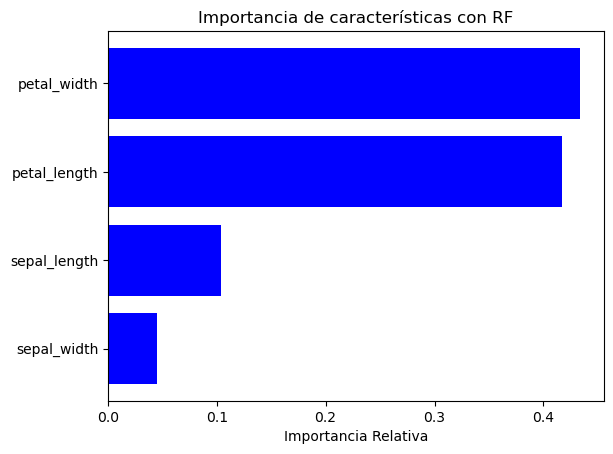

In [14]:
data.head()
#Clasificador que vamos a usar como método de Selección de Características
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

#Generar nuestro modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Ajustar el algoritmo
rf.fit(X_train, y_train)

#Predecir con el clasificador
rf.predict(X_test)

exactitud = rf.score(X_test, y_test)
print(f"Exactitud del clasificador RF: {exactitud}")

#Gráfico de características
caracteristicas = X.columns
importancia = rf.feature_importances_
indices = np.argsort(importancia)

plt.barh(range(len(indices)), importancia[indices], color="b")
plt.title("Importancia de características con RF")
plt.yticks(range(len(indices)),[caracteristicas[i] for i in indices] )
plt.xlabel("Importancia Relativa")
plt.show()

### Método de Regularización L1 (Lasso)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Codificar nuestra variable objetivo
le = LabelEncoder()
y_codif = le.fit_transform(y)

#Escalar nuestras características
scaler = StandardScaler()
X_escalada = scaler.fit_transform(X)

#Conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_escalada, y_codif, test_size=0.3, random_state=42)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

#Ajustar el método
lasso.fit(X_train, y_train)

#Búsqueda de características según coeficientes de lasso
caracteristicas_lasso = np.where(lasso.coef_ != 0) [0]

#Ver qué características se han ponderado
print(f"Características Lasso: {X.columns[caracteristicas_lasso].to_list()}")
print(f"Coeficientes de Lasso: {lasso.coef_}")


Características Lasso: ['petal_length', 'petal_width']
Coeficientes de Lasso: [ 0.         -0.          0.32479449  0.36505464]


### Método de Regularización L2 (Ridge)

In [27]:
from sklearn.linear_model import Ridge

#Crear nuestro modelo
ridge = Ridge(alpha=0.1)

#Ajustar el método
ridge.fit(X_train, y_train)

#Coeficientes de Ridge
print(f"Coeficientes de Ridge: {ridge.coef_}")

importancia_ridge = np.abs(ridge.coef_)
print(f"Importancia de Ridge: {importancia_ridge}")

margen = 0.2
caracteristicas_ridge = np.where(importancia_ridge>margen)[0]
print(f"Importancia de características seleccionadas con Ridge: {X.columns[caracteristicas_ridge].to_list()}")

Coeficientes de Ridge: [-0.08244199 -0.02940035  0.45392771  0.40712143]
Importancia de Ridge: [0.08244199 0.02940035 0.45392771 0.40712143]
Importancia de características seleccionadas con Ridge: ['petal_length', 'petal_width']
